## 1. Setting up the Environment


In [1]:
## Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline


In [2]:
## Loading the dataset 

df = pd.read_csv('googleplaystore.csv')

## Observation of Basic characteristics of the Dataset

In [3]:
## Understanding the dataset

df.head() #preview first few rows
df.tail() #preview last few rows
df.info() #summary of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [4]:
#statistical details of the numerical columns
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [5]:
#Check for number of rows and columns
df.shape

(10841, 13)

In [6]:
#Identify missing values

df.isnull()

#count the sum of the null values

df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [7]:
#Identifying the data types
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

## 2. Data Cleaning

In [8]:
#Type conversion of columns

#Observe the unique values in the Reviews column
df['Reviews'].unique()

#Identify if reviews is completely numeric and check for any non-numeric value
df['Reviews'].str.isnumeric().sum()
df[~df['Reviews'].str.isnumeric()] 


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [9]:
#Create a new independent copy of the original DataFrame df, so the original dataframe won't be affected by modifications
df_copy= df.copy()
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [10]:
#Drop the non numeric index in Reviews columnn before conversion
df_copy=df_copy.drop(df_copy.index[10472])

In [11]:
#Then convert the datatype to an integer
df_copy['Reviews']= df_copy['Reviews'].astype(int)
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.2+ MB


In [12]:
df_copy.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [13]:
#Observe the unique values in the size column
df_copy['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [14]:
# Standardizing the unit of size
# 19000k==19M

In [15]:
df_copy['Size'].isnull().sum()

np.int64(0)

In [16]:
#Standardization 

df_copy['Size']=df_copy['Size'].str.replace('M','000')
df_copy['Size']=df_copy['Size'].str.replace('k', '')
df_copy['Size']=df_copy['Size'].replace('Varies with device', np.nan)
df_copy['Size']=df_copy['Size'].astype(float)


In [17]:
# Observe the unique values of Installs column
df_copy['Installs'].unique()


array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [18]:
# Observe the unique values of Installs column
df_copy['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [19]:
#String Cleaning and text preprocessing 
chars_to_remove= ['+',',','$']
cols_to_clean =['Installs', 'Price']
for item in chars_to_remove:
    for cols in cols_to_clean:
        df_copy[cols]= df_copy[cols].str.replace(item,'')


In [20]:
#Type conversion of Installs
df_copy['Installs'] = df_copy['Installs'].astype(int)


In [21]:
#Type conversion of Price
df_copy['Price']= df_copy['Price'].astype(float)

In [22]:
#Identifying distinct values in the price column
df_copy['Price'].unique()

array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,   1.2 ,   1.04])

In [23]:
#Handling last update feature 
df_copy['Last Updated'].unique()

array(['January 7, 2018', 'January 15, 2018', 'August 1, 2018', ...,
       'January 20, 2014', 'February 16, 2014', 'March 23, 2014'],
      shape=(1377,), dtype=object)

In [24]:
#Date manipulation of the Last Updated column
df_copy['Last Updated']= pd.to_datetime(df_copy['Last Updated'])
df_copy['Day']= df_copy['Last Updated'].dt.day
df_copy['Month']= df_copy['Last Updated'].dt.month
df_copy['Year']= df_copy['Last Updated'].dt.year

In [25]:
# Replace characters "and", "up", "-" with an empty string in 'Android Ver'
df_copy['Android Ver'] = df_copy['Android Ver'].str.replace(r"and|up|-", "", regex=True)

# Replace "Varies ith device" with NaN in 'Android Ver'
df_copy['Android Ver'] = df_copy['Android Ver'].replace('Varies ith device', np.nan)

# Remove leading/trailing spaces from 'Android Ver'
df_copy['Android Ver'] = df_copy['Android Ver'].str.strip()


In [26]:
#Converting Android Ver and Current Ver to a float
df_copy['Android Ver'] = pd.to_numeric(df_copy['Android Ver'], errors='coerce')
df_copy['Current Ver'] = pd.to_numeric(df_copy['Current Ver'], errors='coerce')


## Exploratory Data Analysis

In [27]:
df_copy.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,NaN,NaN,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,NaN,NaN,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,NaN,NaN,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,NaN,4.2,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4,20,6,2018


In [28]:
df_copy.shape


(10840, 16)

In [29]:
#Identifying and dropping duplicates in the App column
df_copy[df_copy.duplicated('App')].shape

df_copy = df_copy.drop_duplicates(subset =['App'], keep ='first')

In [30]:
df_copy.isnull().sum()

App                  0
Category             0
Rating            1463
Reviews              0
Size              1227
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver       6212
Android Ver       2687
Day                  0
Month                0
Year                 0
dtype: int64

## Summary Statistics

In [31]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9659 entries, 0 to 10840
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9659 non-null   object        
 1   Category        9659 non-null   object        
 2   Rating          8196 non-null   float64       
 3   Reviews         9659 non-null   int64         
 4   Size            8432 non-null   float64       
 5   Installs        9659 non-null   int64         
 6   Type            9658 non-null   object        
 7   Price           9659 non-null   float64       
 8   Content Rating  9659 non-null   object        
 9   Genres          9659 non-null   object        
 10  Last Updated    9659 non-null   datetime64[ns]
 11  Current Ver     3447 non-null   float64       
 12  Android Ver     6972 non-null   float64       
 13  Day             9659 non-null   int32         
 14  Month           9659 non-null   int32         
 15  Year    

In [32]:
#identify and separate numerical and categorical features in the df_copy DataFrame
numeric_features = [feature for feature in df_copy.columns if df_copy[feature].dtype != 'O']
categorical_features = [feature for feature in df_copy.columns if df_copy[feature].dtype =='O']

print('There are {} Numerical features: {}'.format(len(numeric_features),numeric_features))
print('There are {} Categorical features: {}'.format(len(categorical_features),categorical_features))

There are 11 Numerical features: ['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Last Updated', 'Current Ver', 'Android Ver', 'Day', 'Month', 'Year']
There are 5 Categorical features: ['App', 'Category', 'Type', 'Content Rating', 'Genres']


## Summary Statistics (Categorical Features)

In [33]:
#Display the distribution of values in each categorical feature 
for col in categorical_features:
    print(df[col].value_counts(normalize = True)*100)
    print('--------------------------')  #prints a separator line for clarity, so that the output for each categorical column is visually separated

App
ROBLOX                                               0.083018
CBS Sports App - Scores, News, Stats & Watch Live    0.073794
Duolingo: Learn Languages Free                       0.064570
Candy Crush Saga                                     0.064570
8 Ball Pool                                          0.064570
                                                       ...   
Fr. Daoud Lamei                                      0.009224
Poop FR                                              0.009224
PLMGSS FR                                            0.009224
List iptv FR                                         0.009224
Kids Paint Free - Drawing Fun                        0.009224
Name: proportion, Length: 9660, dtype: float64
--------------------------
Category
FAMILY                 18.190204
GAME                   10.552532
TOOLS                   7.776035
MEDICAL                 4.270824
BUSINESS                4.243151
PRODUCTIVITY            3.911078
PERSONALIZATION         3.615903


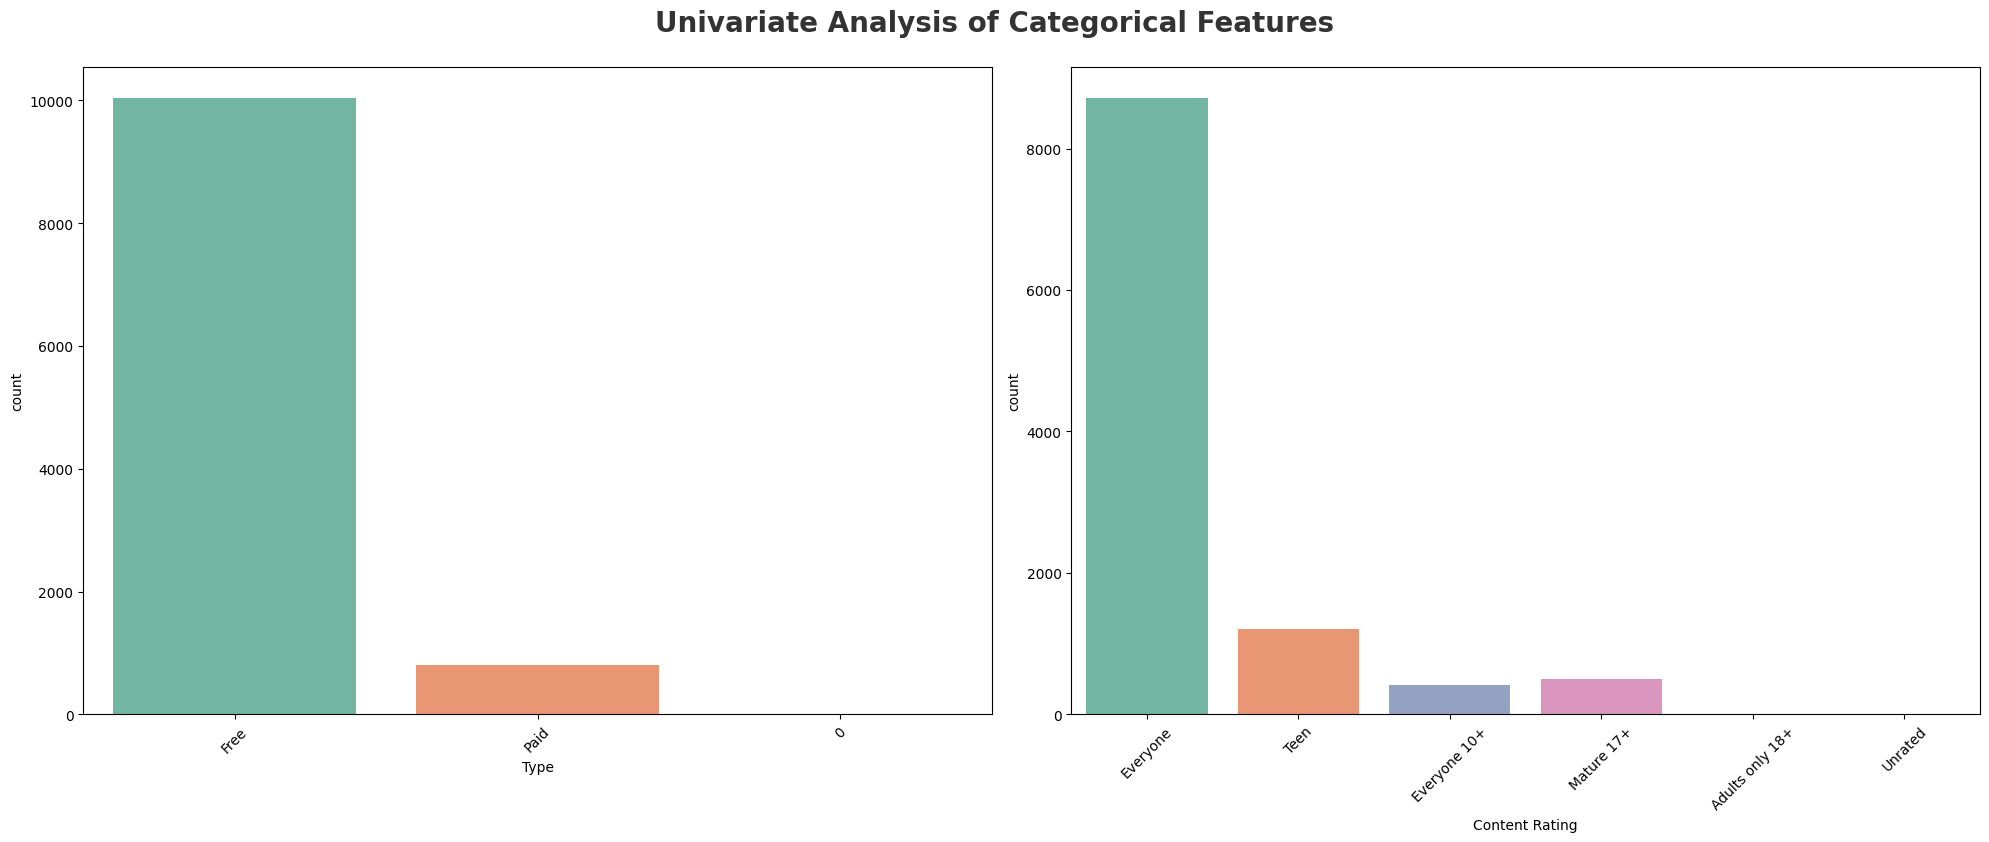

In [34]:
#Visualization of the categorical features (Type and Content Rating)
plt.figure(figsize=(20, 15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
category = [ 'Type', 'Content Rating']
for i in range(0, len(category)):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=df[category[i]],palette="Set2")
    plt.xlabel(category[i])
    plt.xticks(rotation=45)
plt.tight_layout() 
plt.show()

Observation:
-  More people used the free subscription
- 'Everyone' received the most content rating


## Summary Statistics (Numerical Features)

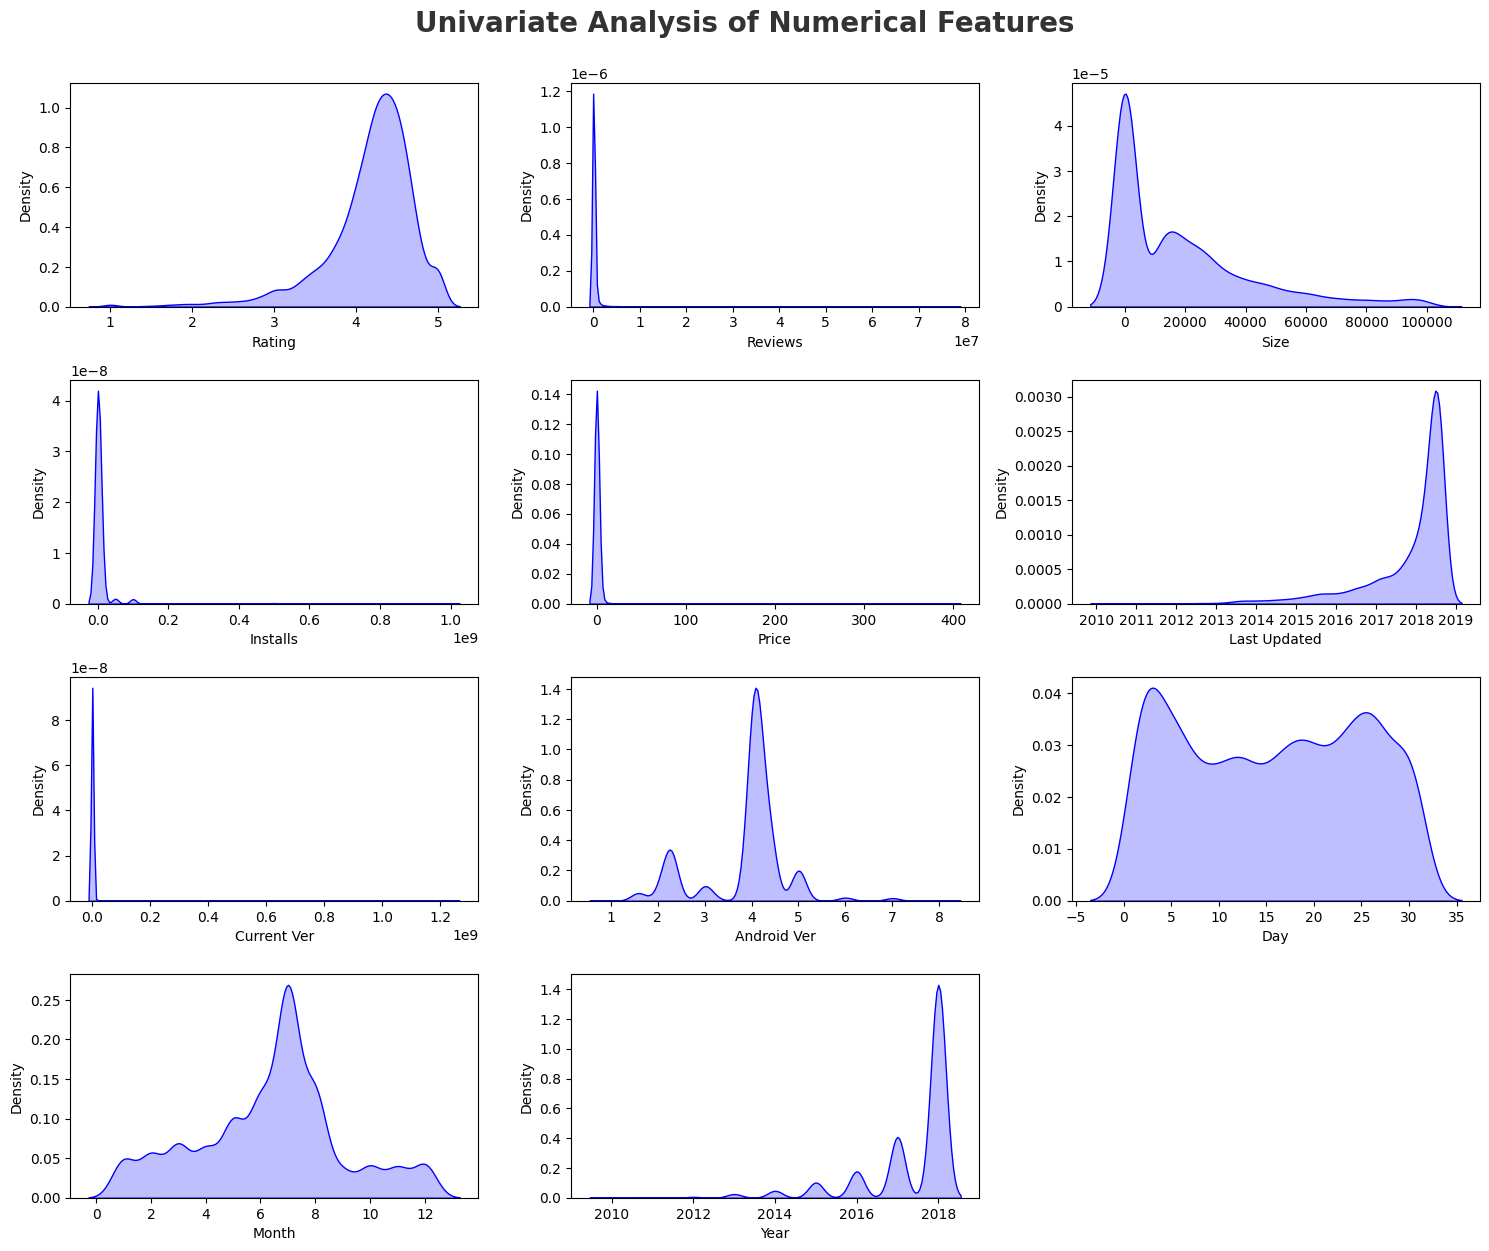

In [35]:
#Summary statistics and visualization of the Numeric features
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.0)

for i in range(0, len(numeric_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df_copy[numeric_features[i]],shade=True, color='b')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()
plt.show()

Observation
- Rating, Year, Last Updated is left skewed while Reviews, Size, installs,Current Ver, Day are right skewed

## Univariate Analysis 


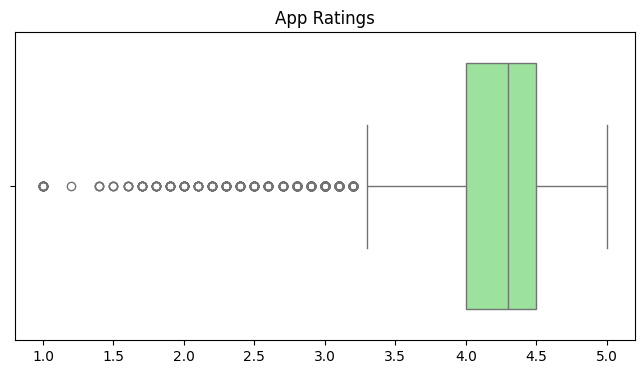

In [36]:
#Identify outliers in the Rating column
plt.figure(figsize=(8, 4))
sns.boxplot(x=df_copy['Rating'], color= 'lightgreen')
plt.title('App Ratings')
plt.xlabel('')
plt.show()

Observation: 
- The rating column has outliers

## 

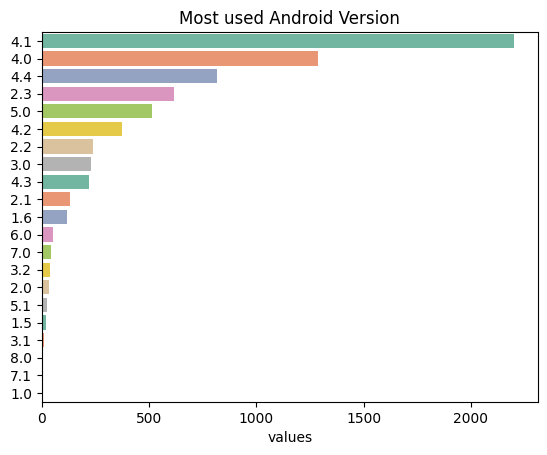

In [37]:
#Distribution of the "Android Ver" column using countplot
order = df_copy['Android Ver'].value_counts().index #sort the values
sns.countplot(y='Android Ver', data=df_copy, order =order, palette='Set2')
plt.title('Most used Android Version')
plt.xlabel('values')
plt.ylabel('')
plt.show()

Observation:
- Most used Android Version is 4.1

## Bivariate Analysis

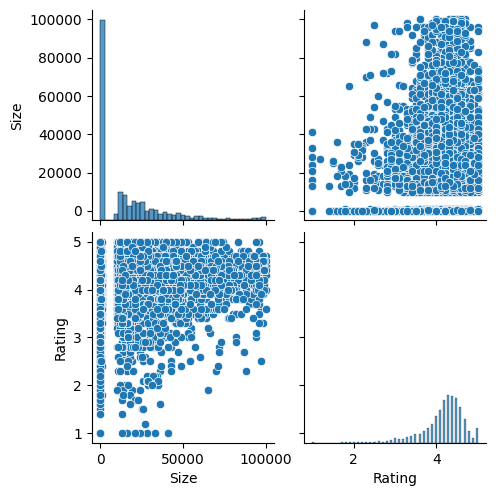

In [38]:
#Relationship between size of app to the rating using pairplot(combination of an histogram and scatter plot)
subset = [ 'Size', 'Rating',]
sns.pairplot(df_copy[subset])
plt.show()

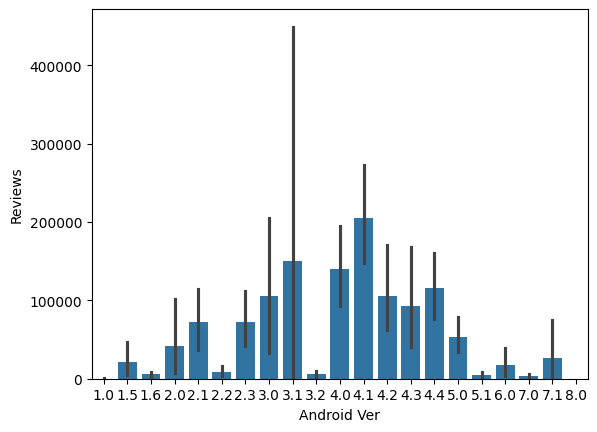

In [39]:
#Relationship between Android Version to the Reviews using 
sns.barplot(x='Android Ver', y='Reviews', data=df_copy)
plt.show()

Observation: Android Version (3.1) had the most reviews while (8.0) had no reviews

## Multivariate Analysis

<Figure size 900x600 with 0 Axes>

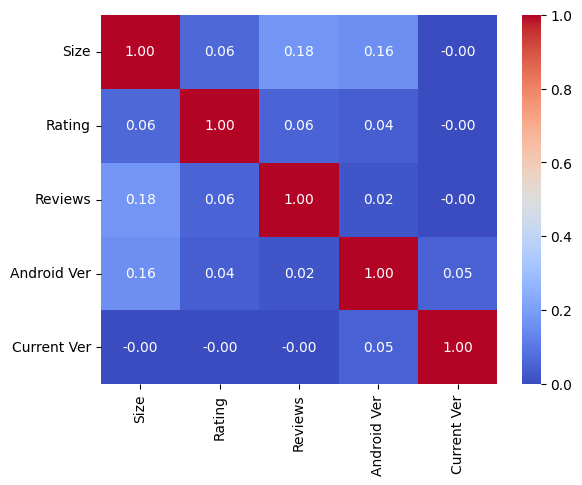

In [40]:
#Display the correlation matrix for a subset of numerical columns
subset = ['Size', 'Rating', 'Reviews', 'Android Ver', 'Current Ver']
plt.figure(figsize= (9, 6))
correlation_matrix = df_copy[subset].corr()
plt.show()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

Observation: Size is strongly positively correlated to Current Ver

## Problem Questions

1. Which is the most popular app category?
2. Which Category has largest number of installations??
3. What are the Top 5 most installed Apps in Each popular Categories ??
4. How many apps are there on Google Play Store which get 5 ratings??

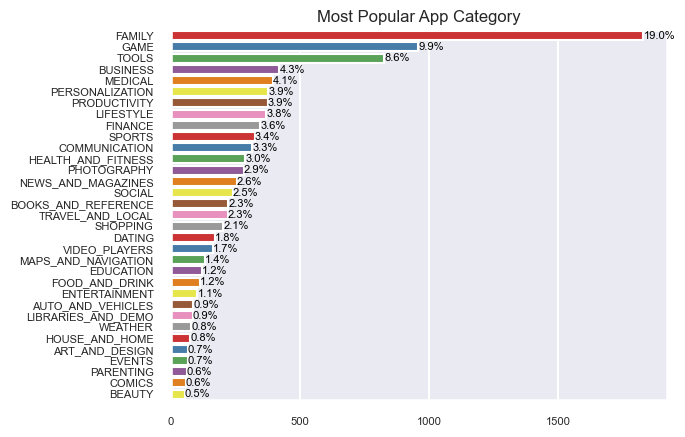

In [59]:
# Most popular App Category
category_counts = df_copy['Category'].value_counts()
category_percentages = (category_counts / len(df_copy)) * 100
category_order = category_counts.index

# Create the count plot with category order
sns.countplot(y='Category', data=df_copy, order=category_order, palette='Set1')

# Add percentage labels to the bars
for index, value in enumerate(category_counts):
    percentage = category_percentages[index]
    plt.text(value, index, f'{percentage:.1f}%', va='center', ha='left', color='black', fontsize=8)

# Adding title and labels
plt.title('Most Popular App Category', size=12)
plt.xlabel('')
plt.ylabel('')
plt.xticks(fontsize= 8)
plt.yticks(fontsize= 8)
plt.show()


Insights
1. Family category has the most number of apps with 19% of apps belonging to it, followed by Games category which has 10% of the apps.
2. Least number of apps belong to the Beauty category with less than 1% of the total apps belonging to it

In [42]:
#Top 10 Categories
category = pd.DataFrame(df_copy['Category'].value_counts())
category.rename(columns={'Category':'Count'}, inplace=True)
category

,count
Category,
FAMILY,1832
GAME,959
TOOLS,827
BUSINESS,420
MEDICAL,395
PERSONALIZATION,376
PRODUCTIVITY,374
LIFESTYLE,369
FINANCE,345


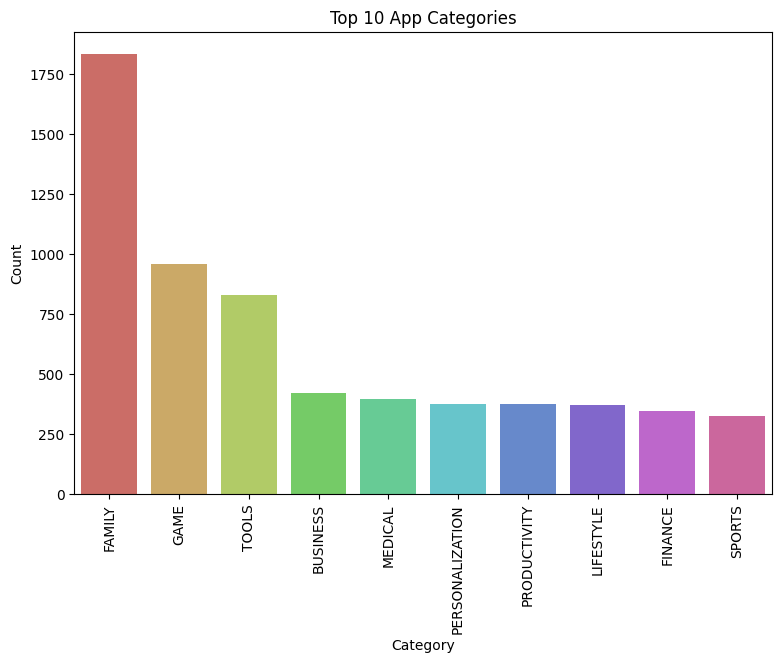

In [43]:
#Top 10 App Categories
category= pd.DataFrame(df_copy['Category'].value_counts())
category.rename (columns={'Category': 'Count'}, inplace= True)
category.reset_index(inplace=True)
category.columns = ['Category', 'Count']

plt.figure(figsize= (9, 6))
sns.barplot(x= 'Category', y='Count', data=category[:10], palette='hls') 
plt.title('Top 10 App Categories')
plt.xticks(rotation=90)
plt.show()

Observation:
- Family is the top most category

In [44]:
df_copy['Installs']= df_copy['Installs'].astype(int)

0     13.878924
1     11.038276
2      8.001772
3      5.793091
4      5.487868
5      4.649148
6      4.427942
7      3.926903
8      2.894887
9      2.369218
10     2.113660
11     1.665970
12     1.532495
13     1.400349
14     1.144023
15     1.096474
16     0.697165
17     0.503824
18     0.503282
19     0.455349
20     0.361101
21     0.352952
22     0.211799
23     0.140926
24     0.114338
25     0.097212
26     0.053130
27     0.052996
28     0.044981
29     0.038193
30     0.031521
31     0.027197
32     0.015973
Name: Installs, dtype: float64


[Text(0, 0, 'GAME'),
 Text(0, 1, 'COMMUNICATION'),
 Text(0, 2, 'TOOLS'),
 Text(0, 3, 'PRODUCTIVITY'),
 Text(0, 4, 'SOCIAL'),
 Text(0, 5, 'PHOTOGRAPHY'),
 Text(0, 6, 'FAMILY'),
 Text(0, 7, 'VIDEO_PLAYERS'),
 Text(0, 8, 'TRAVEL_AND_LOCAL'),
 Text(0, 9, 'NEWS_AND_MAGAZINES')]

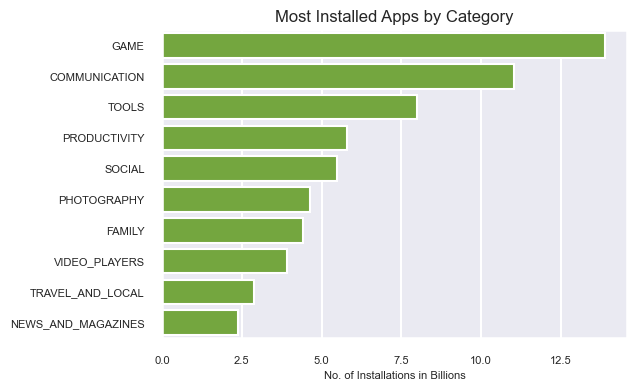

In [69]:
#Most Installed Apps by Category
df_cat_installs = df_copy.groupby(['Category'])['Installs'].sum().sort_values(ascending= False).reset_index()
df_cat_installs.Installs = df_cat_installs.Installs/1000000000
print(df_cat_installs.Installs)
df2 = df_cat_installs.head(10)
plt.figure(figsize = (6, 4))
sns.set_context("talk")
sns.set_style("darkgrid")

ax = sns.barplot(x = 'Installs' , y = 'Category' , data = df2, color="#74B72E" )
ax.set_xlabel('No. of Installations in Billions', size =8)
ax.set_ylabel('')
ax.set_title("Most Installed Apps by Category", size = 12)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=8) 
ax.set_yticklabels(ax.get_yticklabels(), fontsize=8)

Insights
1. Out of all the categories "GAME" has the most number of Installations.
2. With almost 14 Billion Installations GAME is the most popular Category in Google App store

## What are the Top 5 most installed Apps in Each popular Categories ??


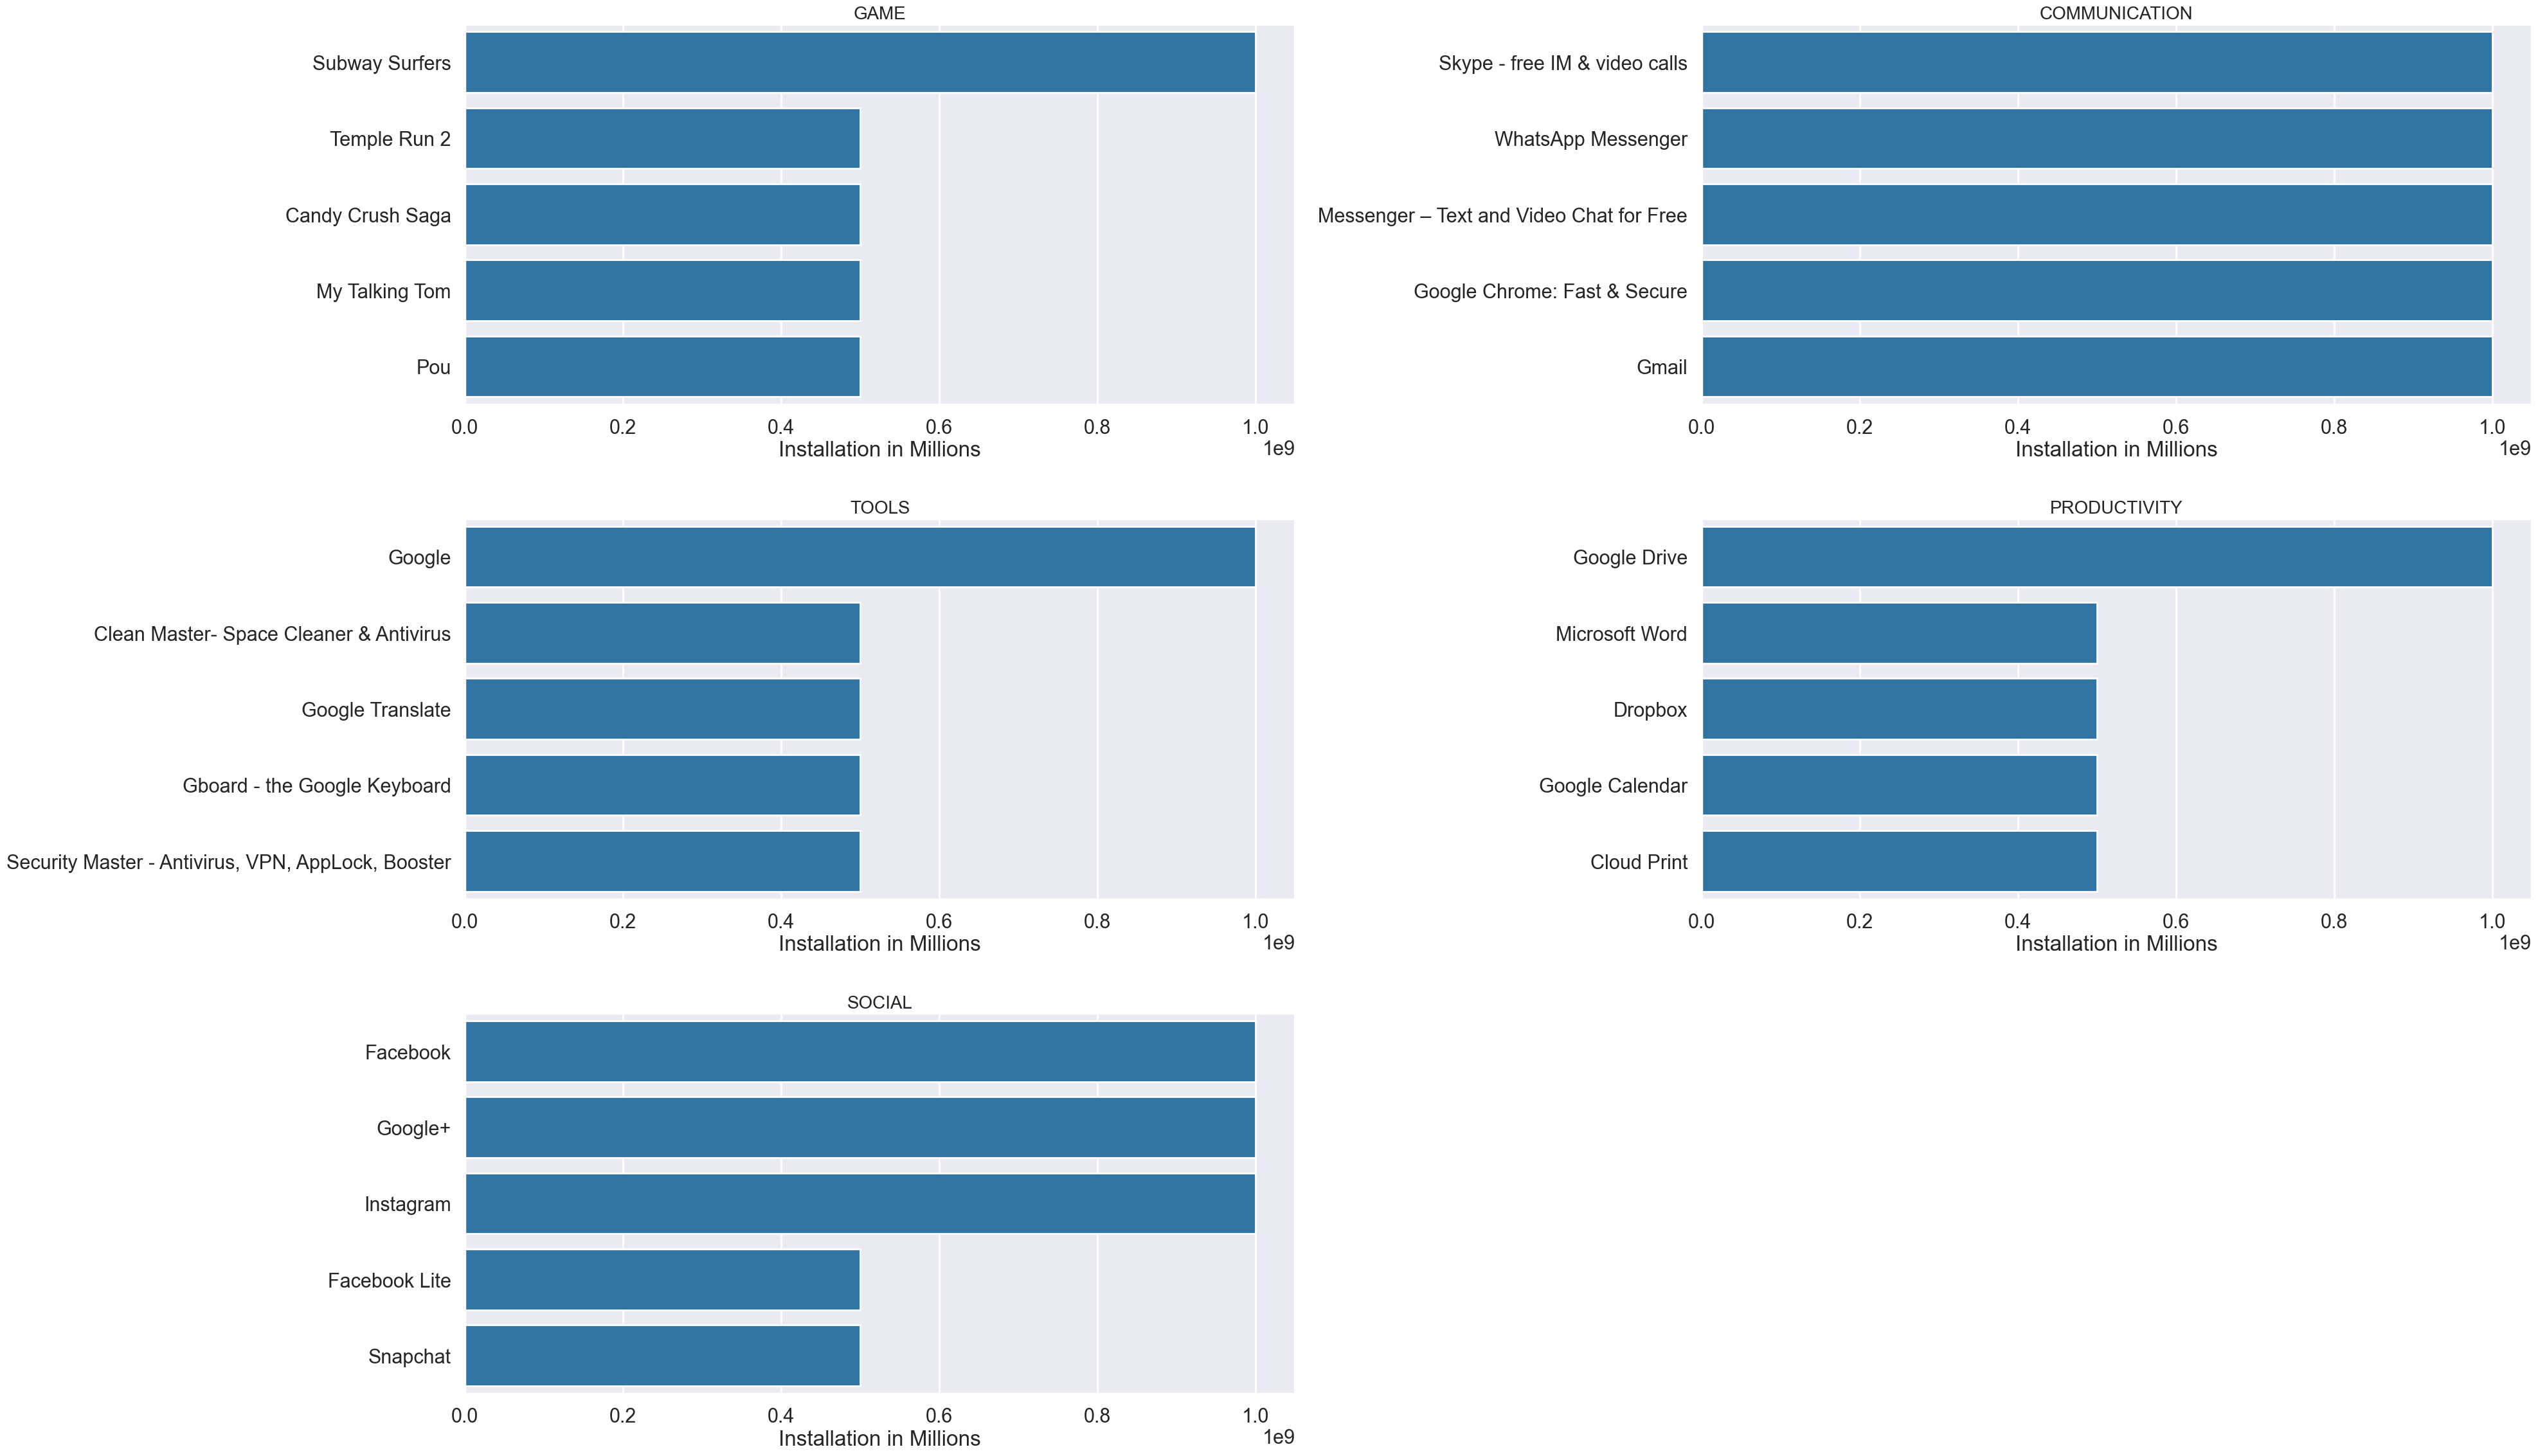

In [72]:
dfa = df_copy.groupby(['Category' ,'App'])['Installs'].sum().reset_index()
dfa = dfa.sort_values('Installs', ascending = False)
apps = ['GAME', 'COMMUNICATION', 'TOOLS', 'PRODUCTIVITY', 'SOCIAL' ]
sns.set_context("poster")
sns.set_style("darkgrid")

plt.figure(figsize=(40,30))

for i,app in enumerate(apps):
    df2 = dfa[dfa.Category == app]
    df3 = df2.head(5)
    plt.subplot(4,2,i+1)
    sns.barplot(data= df3,x= 'Installs' ,y='App')
    plt.xlabel('Installation in Millions')
    plt.ylabel('')
    plt.title(app,size = 20)
    
plt.tight_layout()
plt.subplots_adjust(hspace= .3)
plt.show()

 Insights
- Most popular game is Subway Surfers.
- Most popular productivity app is Google Drive.
- Most popular Tool is Google

## How many apps are there on Google Play Store which get 5 ratings??

In [73]:
rating = df_copy.groupby(['Category','Installs', 'App'])['Rating'].sum().sort_values(ascending = False).reset_index()
toprating_apps = rating[rating.Rating == 5.0]
print("Number of 5.0 rated apps is",toprating_apps.shape[0])
toprating_apps.head(1)

Number of 5.0 rated apps is 271


,Category,Installs,App,Rating
0,FAMILY,10,DN Employee,5.0


Insights
- There are 271 five rated apps on Google Play store
- Top most is 'DN Employee' from 'Family' Category